# Phloem Flow Coupling

In [1]:
import scipy.sparse.linalg as LA
from scipy import sparse
import matplotlib.pylab as plt

import py_plantbox as pb
from rb_tools import *

import xylem_flux 

import timeit

import numpy as np
from scipy.integrate import odeint



# Simulate a root system
name = "Phloem"
plant = pb.Plant()
plant.openXML(name)
plant.initialize()

for i in range (0,30):
    plant.simulate(i)
# for i in range(0,7):
#     plant.simulate(1) 

# Create graph
nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
rseg = seg2a(plant.getSegments(2)) # root system segments
sseg = seg2a(plant.getSegments(4)) # root system segments
seg = np.vstack((sseg,rseg))

# print("number of root segments",len(rseg))
# print("number of shoot segments",len(sseg))
# print("number of segments",len(seg))

print(seg)
#print(sseg[1])




[[  0   2]
 [  2   3]
 [  3   4]
 [  4   5]
 [  5   6]
 [  6   7]
 [  7   8]
 [  8   9]
 [  9  10]
 [ 10  11]
 [ 11  16]
 [ 16  17]
 [  5  36]
 [ 36  37]
 [ 37  54]
 [ 54  55]
 [ 55  56]
 [ 56  57]
 [ 57  72]
 [ 72  73]
 [  1  12]
 [ 12  13]
 [ 13  14]
 [ 14  15]
 [ 15  32]
 [ 32  33]
 [ 33  34]
 [ 34  35]
 [ 35  52]
 [ 52  53]
 [ 15  18]
 [ 18  19]
 [ 19  20]
 [ 20  21]
 [ 21  22]
 [ 22  23]
 [ 23  24]
 [ 24  25]
 [ 25  26]
 [ 26  27]
 [ 27  28]
 [ 28  29]
 [ 29  30]
 [ 30  31]
 [ 31  74]
 [ 74  75]
 [ 31  80]
 [ 80  81]
 [ 31  86]
 [ 86  87]
 [ 31  92]
 [ 92  93]
 [ 31  98]
 [ 98  99]
 [ 31 104]
 [104 105]
 [ 31 110]
 [110 111]
 [ 31 116]
 [116 117]
 [ 31 122]
 [122 123]
 [ 31 128]
 [128 129]
 [ 31 134]
 [134 135]
 [ 31 140]
 [140 141]
 [ 31 146]
 [146 147]
 [ 31 152]
 [152 153]
 [ 31 158]
 [158 159]
 [ 31 164]
 [164 165]
 [ 31 170]
 [170 171]
 [ 31 176]
 [176 177]
 [ 31 182]
 [182 183]
 [ 31 188]
 [188 189]
 [ 31 194]
 [194 195]
 [ 31 200]
 [200 201]
 [ 35  38]
 [ 38  39]
 [ 39  40]

 $J_{\mathrm{WX}}=-\Delta P_{\mathrm{X}}/\mathrm{r_{X}}$.Xylem flow between connected elements,  
Phloem flow between connected elements, $J_{\mathrm{WP}}=-\Delta P_{\mathrm{P}}/\mathrm{r_{P}}$.

Lateral water flow from xylem to phloem is driven by the difference in water potential. $
J_{Wlat}=(\psi_{\mathrm{X}}-\psi_{\mathrm{P}})/\mathrm{r_{lat}}
$  
Taking into account the non-zero partial molal volume of sucrose $\mathrm{\overline{V}}$ adds an extra lateral component to the liquid flow into the sieve tubes: $J_{Wlat}=\mathrm{\overline{V}}\times J_{Slat} (\psi_{\mathrm{X}}-\psi_{\mathrm{P}})/\mathrm{r_{lat}}$  
Hydrostatic pressure $P_{\mathrm{P}}$ within the sieve tubes is given by the difference between total phloem water potential and osmotic potential inside sieve tubes: $P_{\mathrm{P}}=\psi_{\mathrm{P}}-\Pi$

Xylem sap has a very low solute concentration which we shall ignore, so there is no osmotic component to its total water potential:
$P_{\mathrm{X}}=\psi_{\mathrm{X}}$
For a single phloem solute, Π is determined by its concentration C. For a dilute solution, Π is given by the Van’t Hoff relation:

$\Pi= -\mathrm{R} \times \mathrm{T} \times C$  

for dilute solutions, where R is the universal gas constant and T the absolute temperature. For a non-dilute solution, we use the empirical equation stated by Thompson and Holbrook (2003),

$\Pi= -ρ \times \mathrm{T} \times C$  
with $\mathrm{ρ_{w}}$ the density of water and m the molality given by  
$m = C/[\mathrm{ρ_{w}}(1-C \times \mathrm{\overline{V}})]$  

$\sum_{k} J_{W\_k}=0$

$J_{SP}= J_{WP} \times C$

$\frac{\mathrm{d}Q}{\mathrm{d}t}= -J_{Slat}-R_{\mathrm{M}}+\mathrm{Ph}-\frac{\mathrm{d}S}{\mathrm{d}t}$  

$R_{\mathrm{M}} = (\mathrm{K_4} + \mathrm{K_5} C) \times S_r$

where Sr is the structural carbon content of the element biomass, expressed in sucrose equivalents.

Starch metabolism is represented by a general equation derived from Daudet et al. (2002):

$\frac{\mathrm{d}S}{\mathrm{d}t}= \frac{\mathrm{V_{max}}\times C_{\mathrm{Par}}}{K_m+C_{\mathrm{Par}}}\times V_{\mathrm{Par}} - k_hyd \times S +k_6 \times(C_{\mathrm{Par}}-C_{\mathrm{targ}}) \times V_{\mathrm{Par}}$



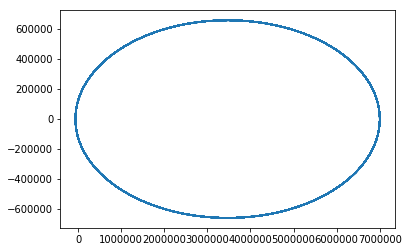

In [21]:
# function that returns dy/dt
def ds_dt(y, t):


    G = 6.672*(10**-11)
    M = 5.972*(10**24)
    mu = G*M
    r = np.sqrt(y[0]**2 + y[1]**2 + y[2]**2)

    dy0 = y[3]
    dy1 = y[4]
    dy2 = y[5]
    dy3 = -(mu / (r**3)) * y[0]
    dy4 = -(mu / (r**3)) * y[1]
    dy5 = -(mu / (r**3)) * y[2]
    return [dy0, dy1, dy2, dy3, dy4, dy5]

t = np.arange(0, 100000, 0.1)
y0 = [7.e6, 0., 0., 0., 1.e3, 0.]
y = odeint(dr_dt, y0, t)
plt.plot(y[:,0], y[:,1])
plt.show()



In [3]:
# Adjacency matrix
A = sparse.coo_matrix((np.ones(seg.shape[0]),(seg[:,0],seg[:,1]))) 

# Parameters for flux model
rs_Kr = np.array([ 2.e-10, 2.e-10, 2.e-10, 2.e-10, 2.e-10, 2.e-11, 2.e-11 ]) # s/m; root hydraulic radial conductivity per root type 
rs_Kz = np.array([ 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14 ]) # m2*s; root hydraulic axial conductivity per root type 

soil_psi = -700 # static soil pressure J kg^-1

rho = 1e3 # kg / m^3      
g = 1.e-3*9.8065 # m / s^2   

pot_trans = np.array([-1.15741e-10]) # # m^3 s^-1 potential transpiration

# Conversions
plant_ana = pb.SegmentAnalyser(plant) 
radius = v2a(plant_ana.getScalar("radius"))/100. # convert from cm to m
type = v2a(plant_ana.getScalar("subtype"))
kr = np.array(list(map(lambda t: rs_Kr[int(t)-1], type))) # convert from 'per type' to 'per segment'
kr.resize((kr.shape[0],1))
kz = np.array(list(map(lambda t: rs_Kz[int(t)-1], type)))     
kz.resize((kz.shape[0],1))          

print(radius)
# glue together shoot and root segments
shoot1 = np.ones((sseg.shape[0],1))                    
shoot0 = np.ones((sseg.shape[0],1))
radius = np.vstack((shoot1,radius))
kr =  np.vstack((shoot0,kr))
kz =  np.vstack((shoot1,kz))  
            
# Call back function for soil potential
soil = lambda x,y,z : soil_psi

# Calculate fluxes within the root system
Q, b = xylem_flux.linear_system(seg, nodes, radius, kr, kz, rho, g, soil)
# plt.spy(Q)
# plt.show()
Q, b = xylem_flux.bc_neumann(Q, b, np.array([0]), np.array([pot_trans]))


start = timeit.default_timer()
x = LA.spsolve(Q, b, use_umfpack = True) # direct
stop = timeit.default_timer()
print ("linear system solved in", stop - start, " s") 
      
# Save results into vtp 
segP = nodes2seg(nodes,seg,x)# save vtp 
axial_flux = xylem_flux.axial_flux(x, seg, nodes, kz, rho, g)
radial_flux = xylem_flux.radial_flux(x, seg, nodes, radius, kr, soil)
net_flux = axial_flux+radial_flux

plant_ana.addUserData(a2v(segP[sseg.shape[0]:]),"pressure")
plant_ana.addUserData(a2v(axial_flux[sseg.shape[0]:]),"axial_flux")
plant_ana.addUserData(a2v(radial_flux[sseg.shape[0]:]),"radial_flux")
plant_ana.addUserData(a2v(net_flux[sseg.shape[0]:]),"net_flux")

plant_ana.write("results/Phloem.vtp")

[[0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00192225]
 [0.00010656]
 [0.00010656]
 [0.00010656]
 [0.00010656]
 [0.00010656]
 [0.00010656]
 [0.00010656]
 [0.002     ]
 [0.002     ]
 [0.002     ]
 [0.002     ]
 [0.002     ]
 [0.002     ]
 [0.002     ]
 [0.002     ]
 [0.002     ]
 [0.002     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.003     ]
 [0.0001729 ]
 [0.0001729 ]
 [0.0002201 ]
 [0.0002201 ]
 [0.00016758]
 [0.00016758]
 [0.00021212]
 [0.00021212]
 [0.00018118]
 [0.00018118]
 [0.00018293]
 [0.00018293]
 [0.00015565]
 [0.00015565]
 [0.00017924]
 [0.00017924]
 [0.00018279]
 [0.00018279]
 [0.00019616]
 [0.00019616]
 [0.0002111 ]
 [0.0002111 ]
 [0.00021763]
 [0.00021763]
 [0.00021966]
 [0.00021966]
 [0.00023698]
 [0.00023698]
 [0.00